# Linear Regression - Regression
Linear regression relates a continuous response (dependent) variable to one or more predictors (features, independent variables), using the assumption that the relationship is linear in nature:
- The relationship between each feature and the response is a straight line when we keep other features constant
- The slope of this line does not depend on the values of the other variables
- The effects of each variable on the response are addictive (but we can include new variables that represent the interaction of two variables)

In other words, the model assumes that the response variable can be explained or predicted by a linear combination of the features, except for random deviations from this linear relationship

### Imports & Settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

### Simple Regression
#### Generate random data

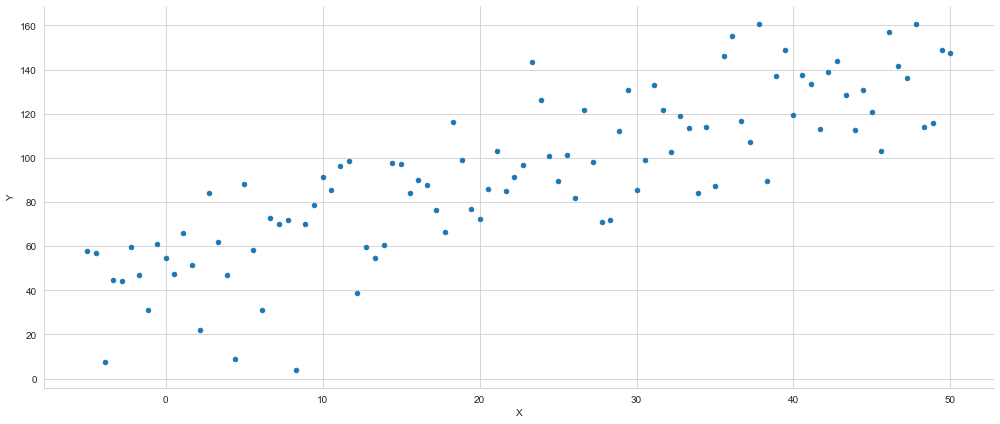

In [13]:
x = np.linspace(-5, 50, 100)
y = 50 + 2*x +np.random.normal(0,20, size=len(x))
data = pd.DataFrame({'X':x, 'Y':y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14,6))
sns.despine()
plt.tight_layout()

Our linear model with a single independent variable on the left-hand side assumes the following:

$$y = \beta_0 + \beta_1 X_1 + \epsilon$$

$\epsilon$ account for the deviation or errors that we will encounter when our data do not fit a straight line. When $\epsilon$ materializes, that is when we run the model of this type on actual data, the errors are called `residual`.

### Estimate a simple regression with statsmodels

The upper part of the summary displays the dataset characteristics, namely the estimation method, the number of observations and parameters, and indicates that the standard error estimates do not account for heteroskedasticity

The middle panel shoes the coefficent values that closely reflect the artifical data generating process. We can confirm that the estimates displayed in the middle of the summary result can be obtained using the OLS formula derived previously:

In [16]:
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     215.8
Date:                Thu, 12 May 2022   Prob (F-statistic):           1.66e-26
Time:                        16:03:53   Log-Likelihood:                -442.47
No. Observations:                 100   AIC:                             888.9
Df Residuals:                      98   BIC:                             894.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.7449      3.516     14.433      0.0

#### Verify calculation

In [19]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

const   50.74
X        1.87
dtype: float64

In [18]:
beta

array([50.74485445,  1.86914632])

### Display model & residuals

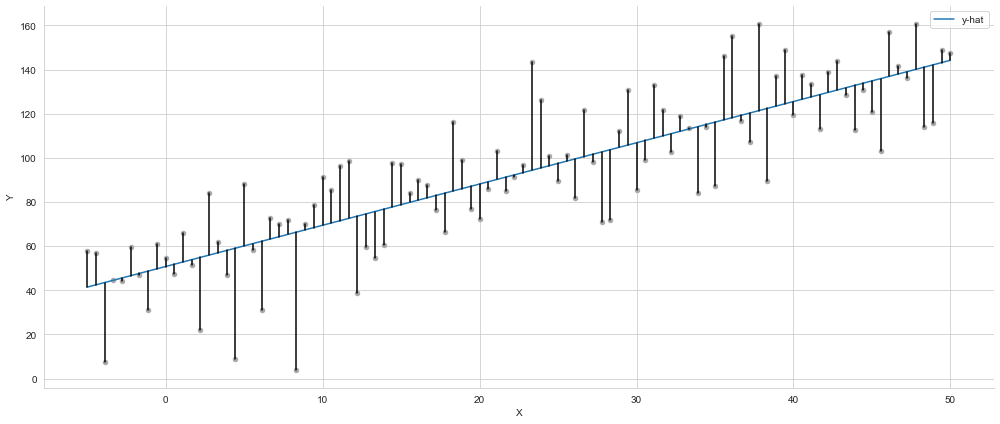

In [29]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax)
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')
sns.despine()
plt.tight_layout()

In [22]:
data

,X,Y,y-hat
0,-5.00,57.65,41.40
1,-4.44,56.84,42.44
2,-3.89,7.39,43.48
3,-3.33,44.86,44.51
4,-2.78,44.10,45.55
...,...,...,...
95,47.78,160.76,140.05
96,48.33,113.95,141.09
97,48.89,115.74,142.13
98,49.44,148.91,143.16
